In [ ]:
import yfinance as yf

In [ ]:
data = yf.download('GOOG',start='2018-01-01',end='2023-01-01')
data = data[['Close']]
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,GOOG
Date,
2018-01-02,52.998970
2018-01-03,53.868855
2018-01-04,54.063927
2018-01-05,54.851692
2018-01-08,55.086082


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#normalize the stock price
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)
#convert data into sequences
def create_sequences(data,time_step=60):
  X = []
  y = []
  for i in range(time_step, len(data)):
    X.append(data[i-time_step:i,0]) #previous 60 days closing price
    y.append(data[i,0]) #price for the next day
  return np.array(X) , np.array(y)

X,y = create_sequences(data_scaled)

#reshape
X = X.reshape(X.shape[0], X.shape[1], 1)

#split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

#build
model = Sequential()

#LSTM layer with 50 units and a dropout layer for regularization
model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

#LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

#output layer
model.add(Dense(units=1))#predicting the next days price

model.compile(optimizer='adam',loss='mean_squared_error')

#fit the model
model.fit(X_train,y_train, epochs=20,batch_size=32)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.0803
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0040
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0032
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0028
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0028
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0022
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0028
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0024
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0020
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0024
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0028
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0021
Epoch 13/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0019
Epoch 14/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0024
Epoch 15/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0024
Epoch 16/20
30/

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


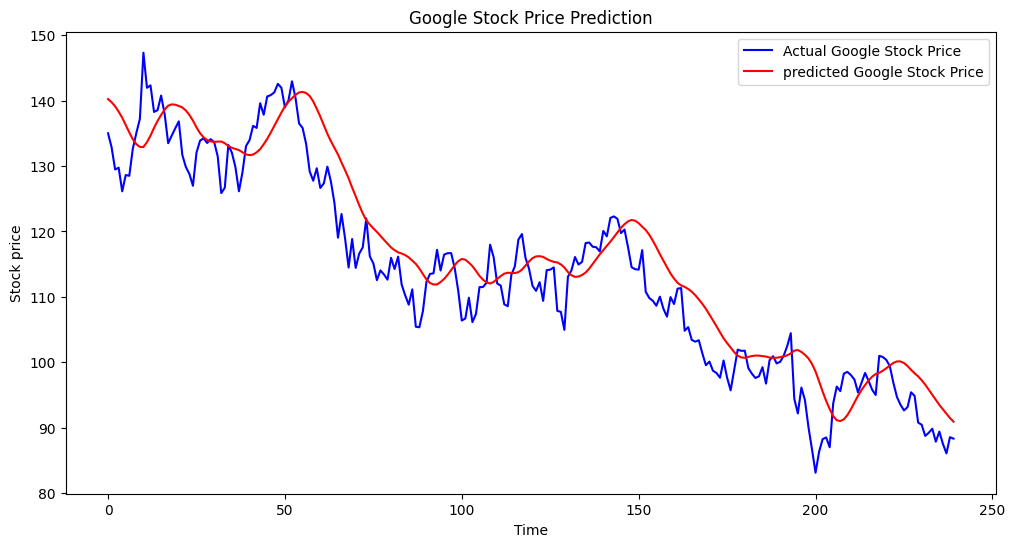

In [ ]:
#predict stock prices for the test set
predictions = model.predict(X_test)

predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

#plotting results
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, color='blue',label='Actual Google Stock Price')
plt.plot(predictions, color='red',label='predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
import math

#calculate RMSE
rmse = math.sqrt(mean_squared_error(y_test_actual, predictions))
print(f'root mean squared error: {rmse}')


root mean squared error: 5.772643331434444
